## Library Imports

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

#### Geting url from website 


In [2]:
url="https://www.eazydiner.com/restaurants?location=hyderabad"

#### connecting to the responces sheet from url ]
##### (HTTP GET request to the web address stored in url using the requests library).


In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

#### html code present in web page

In [5]:

response.text

'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><link rel="alternate" href="https://www.eazydiner.com/restaurants" hrefLang="en-in"/><link rel="alternate" href="https://www.eazydiner.com/restaurants" hrefLang="x-default"/><link rel="icon" href="/images/favicon.ico"/><link rel="next" href="https://www.eazydiner.com/restaurants?location=hyderabad&amp;page=2"/><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"/><title>The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner</title><meta name="description" content="Discover the best restaurants near me. Get up to 50% off at restaurants near me. Find the menus, photos, ratings, price for two, and reviews on EazyDiner."/><meta name="theme-color" content="#7075C3"/><meta property="og:title" content="The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner"/><meta property="og:description" content="Discover the best restaurants near me. Get up to 50% off at restaurants near me

In [6]:
response.text[1:100]

'!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><link rel="alternate" href="https://www.'

In [7]:
response.content

b'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><link rel="alternate" href="https://www.eazydiner.com/restaurants" hrefLang="en-in"/><link rel="alternate" href="https://www.eazydiner.com/restaurants" hrefLang="x-default"/><link rel="icon" href="/images/favicon.ico"/><link rel="next" href="https://www.eazydiner.com/restaurants?location=hyderabad&amp;page=2"/><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"/><title>The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner</title><meta name="description" content="Discover the best restaurants near me. Get up to 50% off at restaurants near me. Find the menus, photos, ratings, price for two, and reviews on EazyDiner."/><meta name="theme-color" content="#7075C3"/><meta property="og:title" content="The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner"/><meta property="og:description" content="Discover the best restaurants near me. Get up to 50% off at restaurants near m

In [8]:
response.content[1:100]

b'!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><link rel="alternate" href="https://www.'

In [9]:
pagecontent = response.text


### Converted "Content "into "Beautifulsoup"
##### (It helps you extract data from web pages by converting raw HTML into a structured format that’s easy to navigate.)

In [10]:
soup = BeautifulSoup(pagecontent)

In [11]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><link href="https://www.eazydiner.com/restaurants" hreflang="en-in" rel="alternate"/><link href="https://www.eazydiner.com/restaurants" hreflang="x-default" rel="alternate"/><link href="/images/favicon.ico" rel="icon"/><link href="https://www.eazydiner.com/restaurants?location=hyderabad&amp;page=2" rel="next"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/><title>The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner</title><meta content="Discover the best restaurants near me. Get up to 50% off at restaurants near me. Find the menus, photos, ratings, price for two, and reviews on EazyDiner." name="description"/><meta content="#7075C3" name="theme-color"/><meta content="The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner" property="og:title"/><meta content="Discover the best restaurants near me. Get up to 50% off at restaurants near me. Find the menus, photos, 

In [12]:

Hname = soup.find("div",attrs={"class":"remove_left_right"})


In [13]:
 Hname

<div class="remove_left_right"><div class="conatiner padding-t-15"><div class="padding-b-15 hide_mobile"><div class="flex hide_mobile"><div><a href="https://www.eazydiner.com/"><div class="margin-r-5 font-13 grey-another-light pointer">Home<!-- --> /</div></a></div><div><a href="https://www.eazydiner.com/hyderabad"><div class="margin-r-5 font-13 grey-another-light pointer">Hyderabad<!-- --> /</div></a></div><div><div class="margin-r-5 font-13 grey-light-dark"> Top Restaurants in Hyderabad</div></div></div></div><div class="hide_mobile"><h1 class="black padding-b-10 font-20 text-left margin-0-auto">Hyderabad Restaurants</h1></div><div class="fixed top-0 full-width listing_header listing_listing_header__79xq7"><div class="padding-10 padding-l-15 padding-r-15 bg-white listing_listing_internal___BxEZ"><div class="flex align-v-center flex-between location_search hide_desktop"><div class="flex align-v-center"><div class="flex pointer"><svg height="16" width="9"><path d="M9 2 3.047 8 9 14l-1.

# Scrapes data 
###  scrapes all restaurant names,locations,offers,rateing,price,restraurent types. from the page and prints them one by one.

In [14]:
Hotel_name = []

for x in soup.find_all('div', attrs={'class': 'relative pointer listing_touch_box__00o7f'}):
    Hotel_name.append(x.text if x else np.nan)

for name in Hotel_name:
    print(name)



63 Degree Modern Regional Buffet4.1Gachibowli, HyderabadRegional Indian₹ 2400 for two approx.%25% Off
63 Degree Modern Regional Buffet4.1Gachibowli, HyderabadRegional Indian₹ 2400 for two approx.%25% Off
Golconda Pavilion4.4ITC Kohenur, HyderabadNorth Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese₹ 2500 for two approx.%10% Off + 25% Off+1 more deal
Golconda Pavilion4.4ITC Kohenur, HyderabadNorth Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese₹ 2500 for two approx.%10% Off + 25% Off+1 more deal
Exotica4.3Banjara Hills, Hyderabad  | View All(2) OutletsMulticuisine₹ 1500 for two approx.%15% Off + 25% Off+1 more deal
Exotica4.3Banjara Hills, Hyderabad  | View All(2) OutletsMulticuisine₹ 1500 for two approx.%15% Off + 25% Off+1 more deal
Forefathers4.6Road No. 45, Jubilee Hills, HyderabadMulticuisine₹ 1500 for two approx.%25% Off
Forefathers4.6Road No. 45, Jubilee Hills, HyderabadMulticuisine₹ 1500 for two approx.%25% Off
The Ofen5.0Banjara Hills, Hydera

### Scrapes data
##### Scrapes data into specific data from websites
##### 1 Rating

In [15]:
rating =[]

for x in soup.find_all('svg',attrs={'xmlns':'http://www.w3.org/2000/svg'}):
    rating.append(x.text if x else np.nan)

for name in rating:
    print(name)






0
4.1


%

4.4


%

4.3


%

4.6


%

5.0


%

4.6


%

4.0


%

4.0


%

4.0


%




### 2 Offers

In [16]:

offers =[]

for x in soup.find_all('div',attrs={'class':'flex align-v-center ellipsis'}):
    offers.append(x.text if x else np.nan)

for name in offers:
    print(name)

%25% Off
%10% Off + 25% Off
%15% Off + 25% Off
%25% Off
%20% Off + 25% Off
%25% Off
%25% Off
%10% Off + 25% Off
%15% Off + 25% Off


### 3 Price

In [17]:
price =[]

for x in soup.find_all('div',attrs={'class':'flex align-v-center'}):
    price.append(x.text if x else np.nan)

for name in price:
    print(name)

LoginOpen App
Your LocationHyderabad
Today, Lunch
₹ 2400 for two approx.
₹ 2500 for two approx.
₹ 1500 for two approx.
₹ 1500 for two approx.
₹ 2000 for two approx.
₹ 2500 for two approx.
₹ 1000 for two approx.
₹ 1000 for two approx.
₹ 800 for two approx.


#### 4 Resterunt_types

In [18]:
Res_type = []
for x in soup.find_all('div', attrs={'class': 'flex align-v-center ellipsis listing_multi_cuisines__zLLXK'}):
    value = x.text if x else np.nan
    Res_type.append(value)
    print(value)


Regional Indian
North Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese
Multicuisine
Multicuisine
Mexican, Italian, Beverages
Multicuisine
Italian
Multicuisine
Cafe


#### 5 Hotel names

In [19]:
Hotel_name =[]

for x in soup.find_all('a',attrs={'class':'ellipsis listing_res_name__uVIN8'}):
    Hotel_name.append(x.text if x else np.nan)

for name in Hotel_name:
    print(name)

63 Degree Modern Regional Buffet
Golconda Pavilion
Exotica
Forefathers
The Ofen
one8 Commune
Pizza Zone
Aster Cafe & Kitchen
Fuel Cafe


### 6 Locations

In [20]:
Location = []   

for x in soup.find_all('div', attrs={'class':'font-12 ellipsis flex listing_res_address__LuVOm'}):
    Location.append(x.text if x else np.nan)

for name in Location:   
    print(name)


Gachibowli, Hyderabad
ITC Kohenur, Hyderabad
Banjara Hills, Hyderabad  | View All(2) Outlets
Road No. 45, Jubilee Hills, Hyderabad
Banjara Hills, Hyderabad
Hitech City, Hyderabad
Habsiguda, Hyderabad  | View All(2) Outlets
Road No. 12, Banjara Hills, Hyderabad
Banjara Hills, Hyderabad


In [21]:
response.headers

{'Date': 'Fri, 07 Nov 2025 08:43:30 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Set-Cookie': 'userLocation=%7B%22name%22%3A%22Hyderabad%22%2C%22code%22%3A%22hyderabad%22%2C%22city_code%22%3A%22hyderabad%22%2C%22city_name%22%3A%22Hyderabad%22%2C%22lat%22%3A17.4138%2C%22long%22%3A78.4398%2C%22city_id%22%3A15%2C%22country_id%22%3A1%2C%22group_id%22%3A4036%2C%22area_id%22%3A1956%2C%22subarea_id%22%3A3059%2C%22region_id%22%3A58%7D; Max-Age=2592000; Path=/; HttpOnly; SameSite=Strict', 'Cache-Control': 'private, no-cache, no-store, max-age=0, must-revalidate', 'ETag': '"rmr348j6ce56pl"', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip'}

#### checking the code responces working in 200 or not
#### (This code checks if the HTTP request succeeded and returned non‑empty content; if so, it tries to parse the response as JSON.)

In [22]:
if response.status_code == 200 and response.text.strip():
    try:
        data = response.json()
    except ValueError:
        print("Response is not valid JSON:")
        print(response.text)
else:
    print(f"Request failed or empty response. Status code: {response.status_code}")


Response is not valid JSON:
<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><link rel="alternate" href="https://www.eazydiner.com/restaurants" hrefLang="en-in"/><link rel="alternate" href="https://www.eazydiner.com/restaurants" hrefLang="x-default"/><link rel="icon" href="/images/favicon.ico"/><link rel="next" href="https://www.eazydiner.com/restaurants?location=hyderabad&amp;page=2"/><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"/><title>The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner</title><meta name="description" content="Discover the best restaurants near me. Get up to 50% off at restaurants near me. Find the menus, photos, ratings, price for two, and reviews on EazyDiner."/><meta name="theme-color" content="#7075C3"/><meta property="og:title" content="The 20 Best Restaurants in HyderabadNov 2025 | EazyDiner"/><meta property="og:description" content="Discover the best restaurants near me. Get up to 50%

## Arranging the  data
 This script scrapes restaurant details (name, price, rating, location, offers, type, etc.) from the EazyDiner Hyderabad listings using BeautifulSoup and stores them in lists.
 It loops through multiple pages, collects the data, and prints how long each page and the entire scraping process took

In [23]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time

Hotel_name = [] 
Price = []
Rating = []
Location = []
Timings= []
#Menu= []
Offers= []
Resterunt_types= []
#Likes=[]
pagenum = []

total_time = time.time()

for i in range(1, 98): 
    start_time = time.time()
    URL = f"https://www.eazydiner.com/restaurants?location=hyderabad"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'relative pointer listing_touch_box__00o7f'}):
        Hname = x.find('a', attrs={'class':'ellipsis listing_res_name__uVIN8'})
        price = x.find('div', attrs={'class':'flex align-v-center'})   # discounted price
        rating = x.find('svg',attrs={'xmlns':'http://www.w3.org/2000/svg'})
        location = x.find('div', attrs={'class':'font-12 ellipsis flex listing_res_address__LuVOm'})
        timings= x.find('div', attrs={'class':'flex margin-r-10'})
        #menu=x.find('div',attrs={'class':'flex hide_scroll listing_filter_tab__88_Pg'})
        offers = x.find('div',attrs={'class':'flex align-v-center ellipsis'})
        res_type= x.find('div', attrs={'class': 'flex align-v-center ellipsis listing_multi_cuisines__zLLXK'})
        #like=x.find('div', attrs={'class': 'flex align-v-center ellipsis listing_multi_cuisines__zLLXK'})
        

        Hotel_name.append(Hname.text if Hname else np.nan)
        Price.append(price.text if price else np.nan)
        Rating.append(rating.text if rating else np.nan)
        Location.append(location.text if location else np.nan)
        #Timings.append(timings.text if timings else np.nan)
        #Menu.append(menu.text if menu else np.nan)
        Offers.append(offers.text if offers else np.nan)
        Resterunt_types.append( res_type.text if  res_type else np.nan)
       # Like.append(res_type.text if res_type else np.nan)
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))





Page 1 completed in 1.16 seconds
Page 2 completed in 1.14 seconds
Page 3 completed in 0.97 seconds
Page 4 completed in 1.16 seconds
Page 5 completed in 1.22 seconds
Page 6 completed in 1.19 seconds
Page 7 completed in 1.01 seconds
Page 8 completed in 1.10 seconds
Page 9 completed in 1.03 seconds
Page 10 completed in 1.17 seconds
Page 11 completed in 0.96 seconds
Page 12 completed in 0.92 seconds
Page 13 completed in 1.14 seconds
Page 14 completed in 0.84 seconds
Page 15 completed in 0.89 seconds
Page 16 completed in 1.14 seconds
Page 17 completed in 1.06 seconds
Page 18 completed in 0.89 seconds
Page 19 completed in 0.96 seconds
Page 20 completed in 1.38 seconds
Page 21 completed in 1.13 seconds
Page 22 completed in 1.16 seconds
Page 23 completed in 1.03 seconds
Page 24 completed in 1.06 seconds
Page 25 completed in 1.02 seconds
Page 26 completed in 1.03 seconds
Page 27 completed in 1.27 seconds
Page 28 completed in 0.98 seconds
Page 29 completed in 1.05 seconds
Page 30 completed in 1.

#### creating the pandas data frame
#### it organizes your scraped restaurant details into a structured table format so you can analyze, filter, or export the data easily.

In [29]:
Hotel_df= pd.DataFrame({
    "Hotel_name" : Hotel_name,
    "Price" : Price,
    "Rating" : Rating,
    "Location" : Location,
    #"Timings": Timings,
    #"Menu": Menu,
    "Offers": Offers,
    "Restaurant_types":Resterunt_types
    #"Likes": Likes
})

In [30]:
Hotel_df

,Hotel_name,Price,Rating,Location,Offers,Restaurant_types
0,63 Degree Modern Regional Buffet,₹ 2400 for two approx.,4.1,"Gachibowli, Hyderabad",%25% Off,Regional Indian
1,63 Degree Modern Regional Buffet,₹ 2400 for two approx.,4.1,"Gachibowli, Hyderabad",%25% Off,Regional Indian
2,Golconda Pavilion,₹ 2500 for two approx.,4.4,"ITC Kohenur, Hyderabad",%10% Off + 25% Off,"North Indian, Multicuisine, Continental, Desse..."
3,Golconda Pavilion,₹ 2500 for two approx.,4.4,"ITC Kohenur, Hyderabad",%10% Off + 25% Off,"North Indian, Multicuisine, Continental, Desse..."
4,Exotica,₹ 1500 for two approx.,4.3,"Banjara Hills, Hyderabad | View All(2) Outlets",%15% Off + 25% Off,Multicuisine
...,...,...,...,...,...,...
1741,Pizza Zone,₹ 1000 for two approx.,4.0,"Habsiguda, Hyderabad | View All(2) Outlets",%25% Off,Italian
1742,Aster Cafe & Kitchen,₹ 1000 for two approx.,4.0,"Road No. 12, Banjara Hills, Hyderabad",%10% Off + 25% Off,Multicuisine
1743,Aster Cafe & Kitchen,₹ 1000 for two approx.,4.0,"Road No. 12, Banjara Hills, Hyderabad",%10% Off + 25% Off,Multicuisine
1744,Fuel Cafe,₹ 800 for two approx.,4.0,"Banjara Hills, Hyderabad",%15% Off + 25% Off,Cafe


In [31]:
# finding the null values in data frame 
Hotel_df.isnull().sum()

Hotel_name          0
Price               0
Rating              0
Location            0
Offers              0
Restaurant_types    0
dtype: int64

In [32]:
Hotel_df.to_csv("hotel.csv",index=False)

In [33]:
df = pd.read_csv("hotel.csv")
df

,Hotel_name,Price,Rating,Location,Offers,Restaurant_types
0,63 Degree Modern Regional Buffet,₹ 2400 for two approx.,4.1,"Gachibowli, Hyderabad",%25% Off,Regional Indian
1,63 Degree Modern Regional Buffet,₹ 2400 for two approx.,4.1,"Gachibowli, Hyderabad",%25% Off,Regional Indian
2,Golconda Pavilion,₹ 2500 for two approx.,4.4,"ITC Kohenur, Hyderabad",%10% Off + 25% Off,"North Indian, Multicuisine, Continental, Desse..."
3,Golconda Pavilion,₹ 2500 for two approx.,4.4,"ITC Kohenur, Hyderabad",%10% Off + 25% Off,"North Indian, Multicuisine, Continental, Desse..."
4,Exotica,₹ 1500 for two approx.,4.3,"Banjara Hills, Hyderabad | View All(2) Outlets",%15% Off + 25% Off,Multicuisine
...,...,...,...,...,...,...
1741,Pizza Zone,₹ 1000 for two approx.,4.0,"Habsiguda, Hyderabad | View All(2) Outlets",%25% Off,Italian
1742,Aster Cafe & Kitchen,₹ 1000 for two approx.,4.0,"Road No. 12, Banjara Hills, Hyderabad",%10% Off + 25% Off,Multicuisine
1743,Aster Cafe & Kitchen,₹ 1000 for two approx.,4.0,"Road No. 12, Banjara Hills, Hyderabad",%10% Off + 25% Off,Multicuisine
1744,Fuel Cafe,₹ 800 for two approx.,4.0,"Banjara Hills, Hyderabad",%15% Off + 25% Off,Cafe


#### clean the data frame price column in data frame
####  it strips out non‑numeric characters from the Price column so you can work with clean numbers.

In [34]:

df['Price'] = df['Price'].replace('[^0-9.]', '', regex=True)

In [35]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [36]:
df.head()

,Hotel_name,Price,Rating,Location,Offers,Restaurant_types
0,63 Degree Modern Regional Buffet,2400.0,4.1,"Gachibowli, Hyderabad",%25% Off,Regional Indian
1,63 Degree Modern Regional Buffet,2400.0,4.1,"Gachibowli, Hyderabad",%25% Off,Regional Indian
2,Golconda Pavilion,2500.0,4.4,"ITC Kohenur, Hyderabad",%10% Off + 25% Off,"North Indian, Multicuisine, Continental, Desse..."
3,Golconda Pavilion,2500.0,4.4,"ITC Kohenur, Hyderabad",%10% Off + 25% Off,"North Indian, Multicuisine, Continental, Desse..."
4,Exotica,1500.0,4.3,"Banjara Hills, Hyderabad | View All(2) Outlets",%15% Off + 25% Off,Multicuisine


#### it cleans the Offers column so only discount percentages remain.

In [37]:

df['Offers'] = df['Offers'].str.extract(r'(\d+%)')

In [38]:
df = df.dropna(subset=['Offers'])


In [39]:
df

,Hotel_name,Price,Rating,Location,Offers,Restaurant_types
0,63 Degree Modern Regional Buffet,2400.0,4.1,"Gachibowli, Hyderabad",25%,Regional Indian
1,63 Degree Modern Regional Buffet,2400.0,4.1,"Gachibowli, Hyderabad",25%,Regional Indian
2,Golconda Pavilion,2500.0,4.4,"ITC Kohenur, Hyderabad",10%,"North Indian, Multicuisine, Continental, Desse..."
3,Golconda Pavilion,2500.0,4.4,"ITC Kohenur, Hyderabad",10%,"North Indian, Multicuisine, Continental, Desse..."
4,Exotica,1500.0,4.3,"Banjara Hills, Hyderabad | View All(2) Outlets",15%,Multicuisine
...,...,...,...,...,...,...
1741,Pizza Zone,1000.0,4.0,"Habsiguda, Hyderabad | View All(2) Outlets",25%,Italian
1742,Aster Cafe & Kitchen,1000.0,4.0,"Road No. 12, Banjara Hills, Hyderabad",10%,Multicuisine
1743,Aster Cafe & Kitchen,1000.0,4.0,"Road No. 12, Banjara Hills, Hyderabad",10%,Multicuisine
1744,Fuel Cafe,800.0,4.0,"Banjara Hills, Hyderabad",15%,Cafe


In [40]:
df.dtypes

Hotel_name           object
Price               float64
Rating              float64
Location             object
Offers               object
Restaurant_types     object
dtype: object

#### downloading the data file in xlsx file 

In [41]:
df.to_excel("output.xlsx", index=False)

# data analysis and visualization

In [64]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Check dataset info
print("Shape of Data:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape of Data: (1746, 6)

Data Types:
 Hotel_name           object
Price                 int64
Rating              float64
Location             object
Offers               object
Restaurant_types     object
dtype: object

Missing Values:
 Hotel_name          0
Price               0
Rating              0
Location            0
Offers              0
Restaurant_types    0
dtype: int64


### Identify categorical and continuous variables

In [66]:

cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols))


Categorical Columns: ['Hotel_name', 'Location', 'Offers', 'Restaurant_types']
Numerical Columns: ['Price', 'Rating']


### Univariate Analysis - Individual Variable Plots

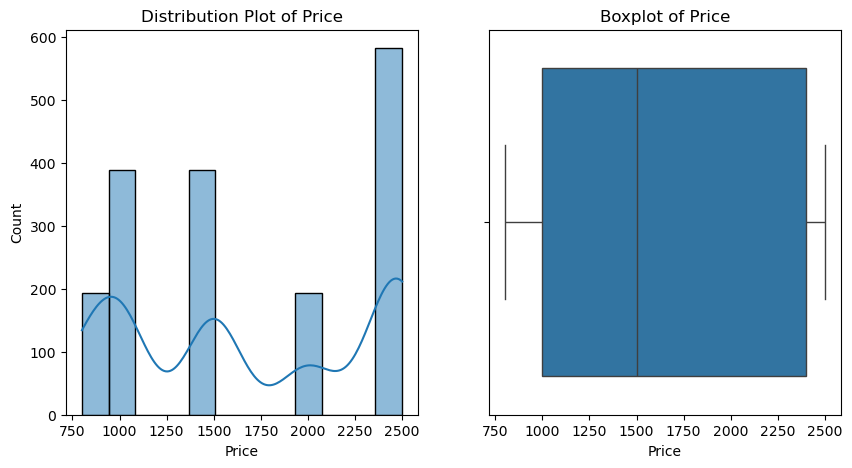

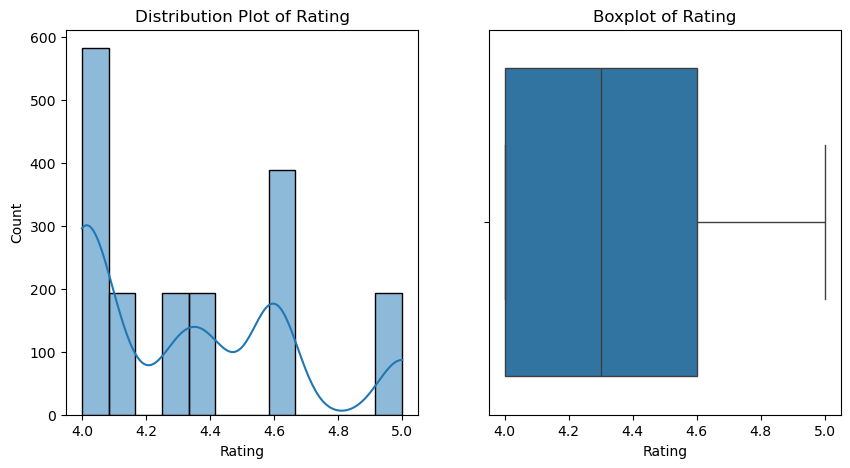

In [67]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution Plot of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


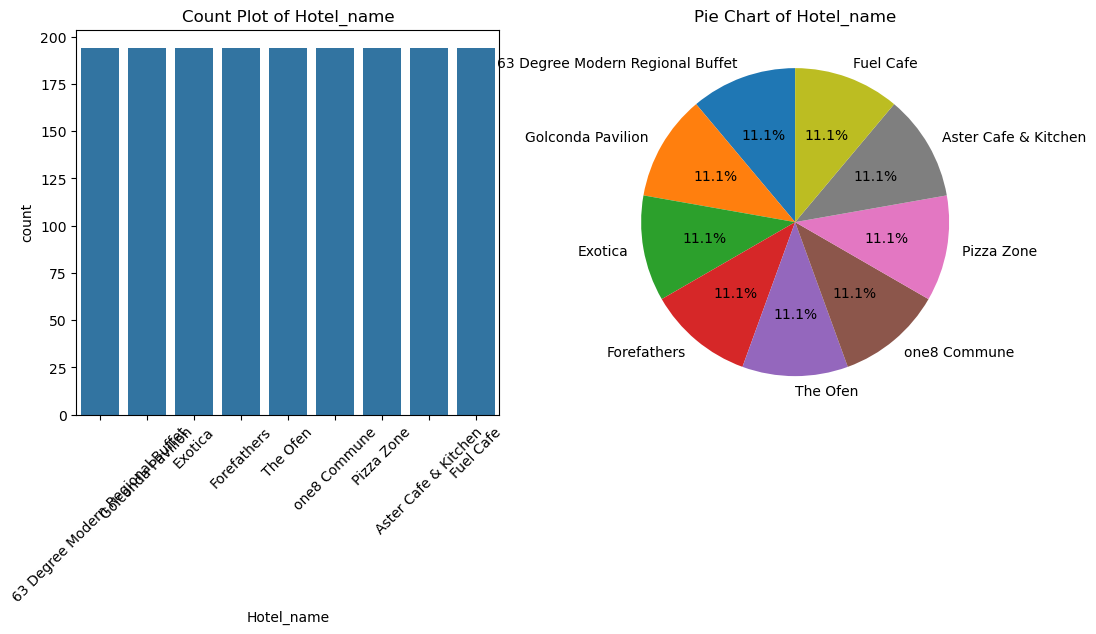

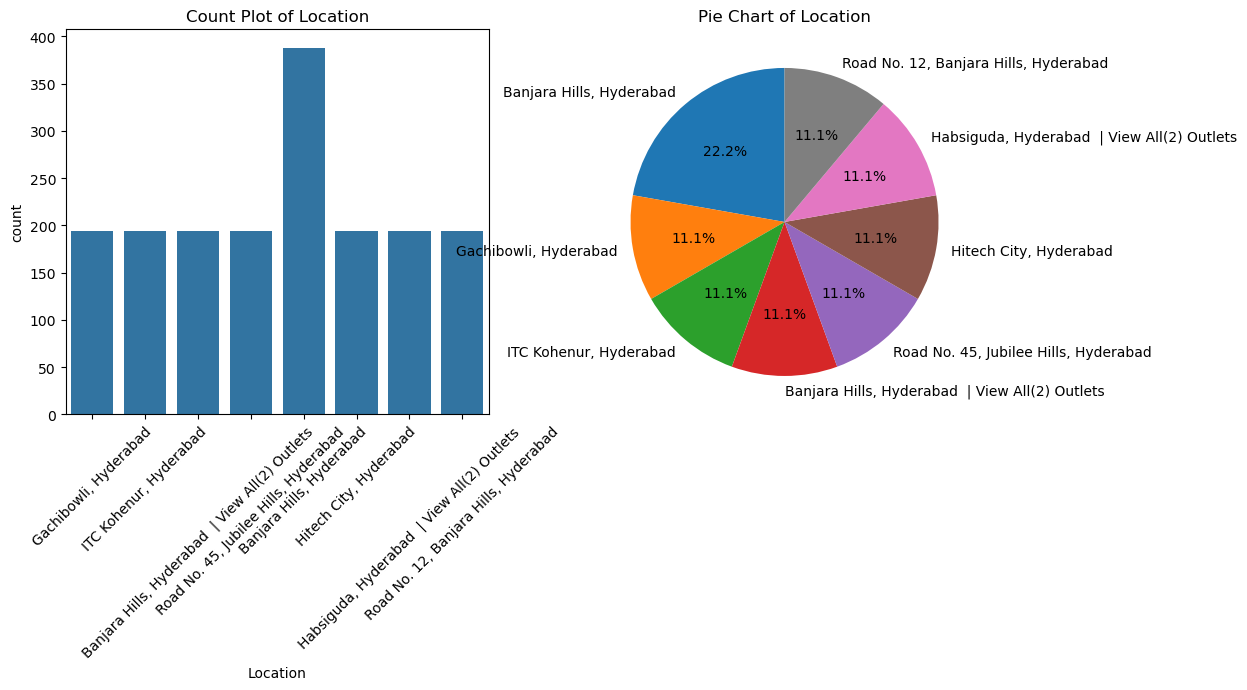

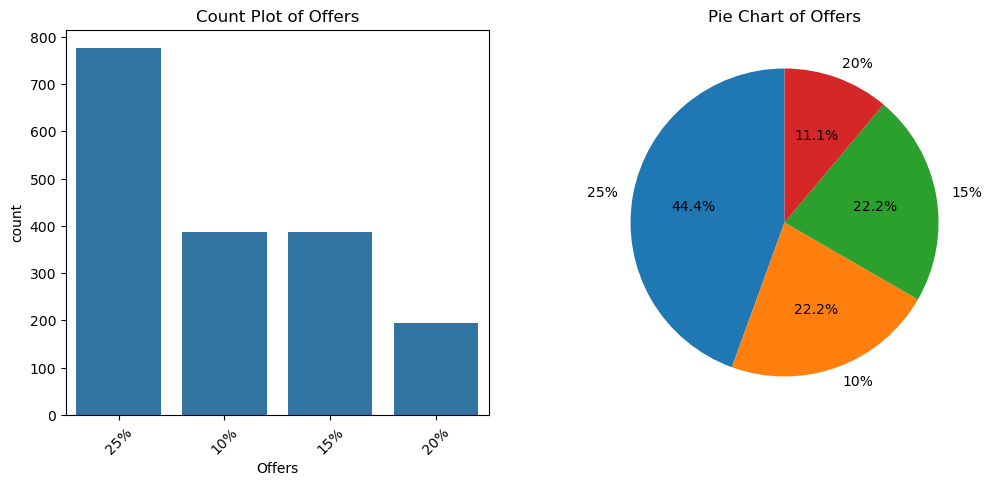

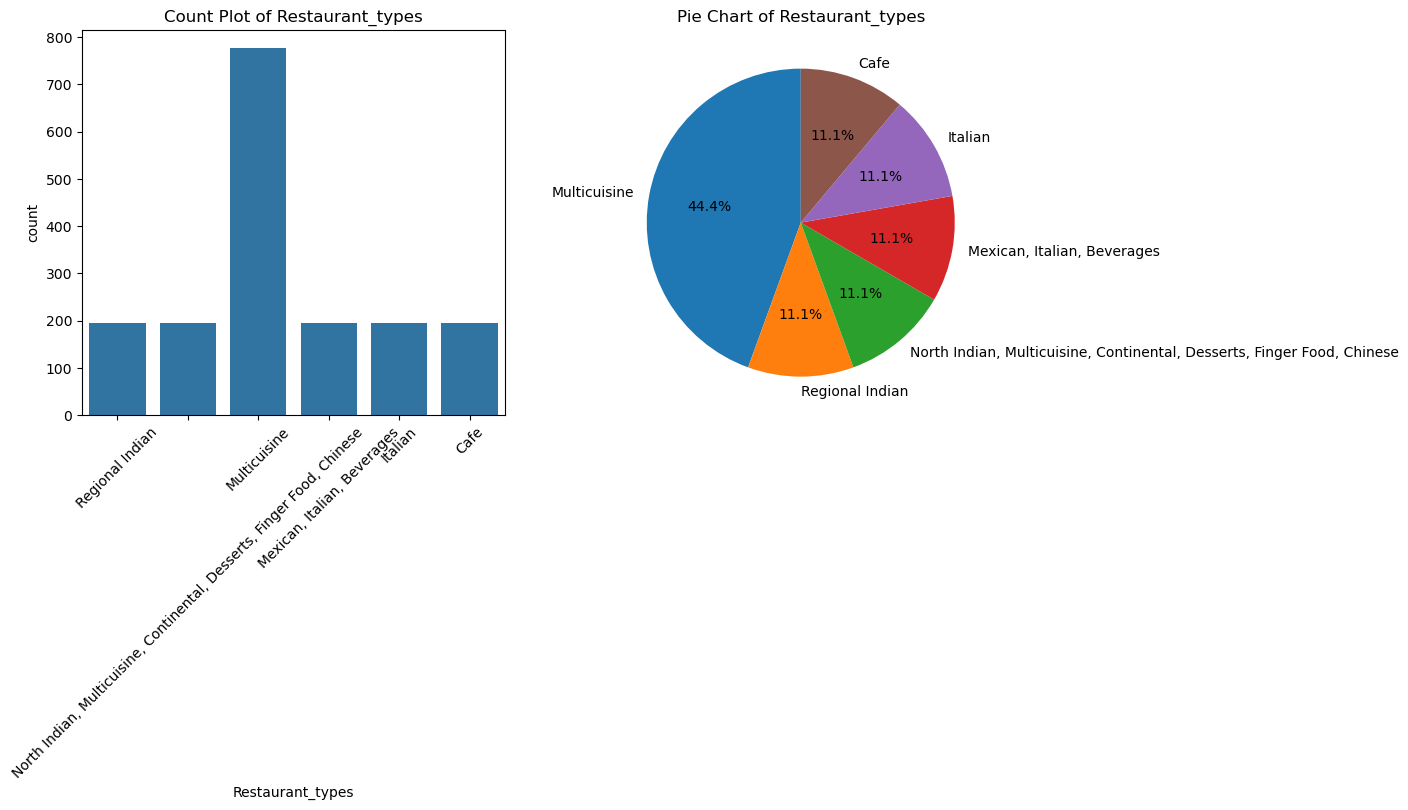

In [68]:
for col in cat_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')
    plt.show()

### Bivariate analysis (continuous–categorical and continuous–continuous).
#### 4 Continuous vs Categorical - Groupby / Pivot / Box / Violin

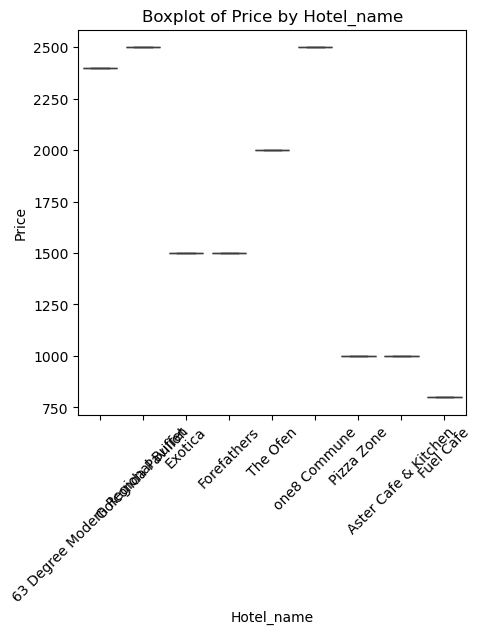

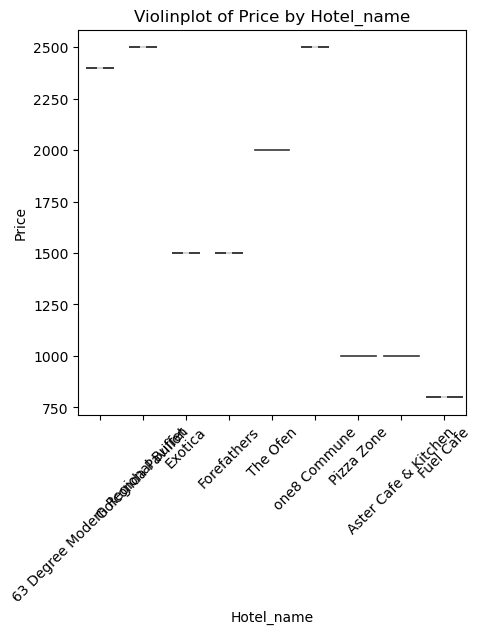


Groupby Summary: Price by Hotel_name


,mean,median,min,max,count
Hotel_name,,,,,
63 Degree Modern Regional Buffet,2400.0,2400.0,2400,2400,194
Aster Cafe & Kitchen,1000.0,1000.0,1000,1000,194
Exotica,1500.0,1500.0,1500,1500,194
Forefathers,1500.0,1500.0,1500,1500,194
Fuel Cafe,800.0,800.0,800,800,194
Golconda Pavilion,2500.0,2500.0,2500,2500,194
Pizza Zone,1000.0,1000.0,1000,1000,194
The Ofen,2000.0,2000.0,2000,2000,194
one8 Commune,2500.0,2500.0,2500,2500,194



Pivot Table: Price by Hotel_name


,mean,count
,Price,Price
Hotel_name,,
63 Degree Modern Regional Buffet,2400.0,194
Aster Cafe & Kitchen,1000.0,194
Exotica,1500.0,194
Forefathers,1500.0,194
Fuel Cafe,800.0,194
Golconda Pavilion,2500.0,194
Pizza Zone,1000.0,194
The Ofen,2000.0,194


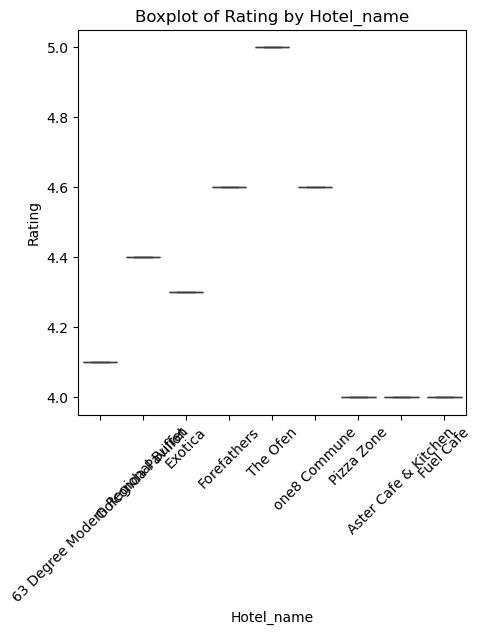

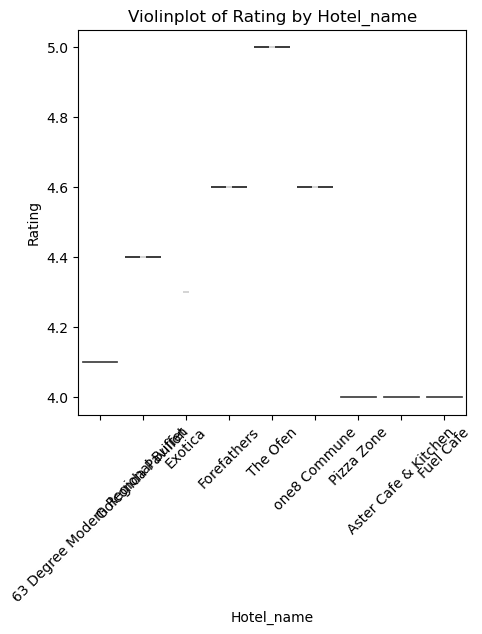


Groupby Summary: Rating by Hotel_name


,mean,median,min,max,count
Hotel_name,,,,,
63 Degree Modern Regional Buffet,4.1,4.1,4.1,4.1,194
Aster Cafe & Kitchen,4.0,4.0,4.0,4.0,194
Exotica,4.3,4.3,4.3,4.3,194
Forefathers,4.6,4.6,4.6,4.6,194
Fuel Cafe,4.0,4.0,4.0,4.0,194
Golconda Pavilion,4.4,4.4,4.4,4.4,194
Pizza Zone,4.0,4.0,4.0,4.0,194
The Ofen,5.0,5.0,5.0,5.0,194
one8 Commune,4.6,4.6,4.6,4.6,194



Pivot Table: Rating by Hotel_name


,mean,count
,Rating,Rating
Hotel_name,,
63 Degree Modern Regional Buffet,4.1,194
Aster Cafe & Kitchen,4.0,194
Exotica,4.3,194
Forefathers,4.6,194
Fuel Cafe,4.0,194
Golconda Pavilion,4.4,194
Pizza Zone,4.0,194
The Ofen,5.0,194


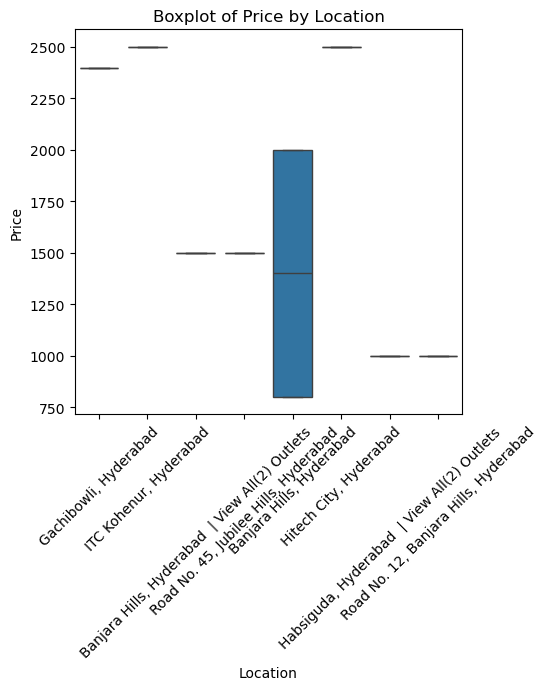

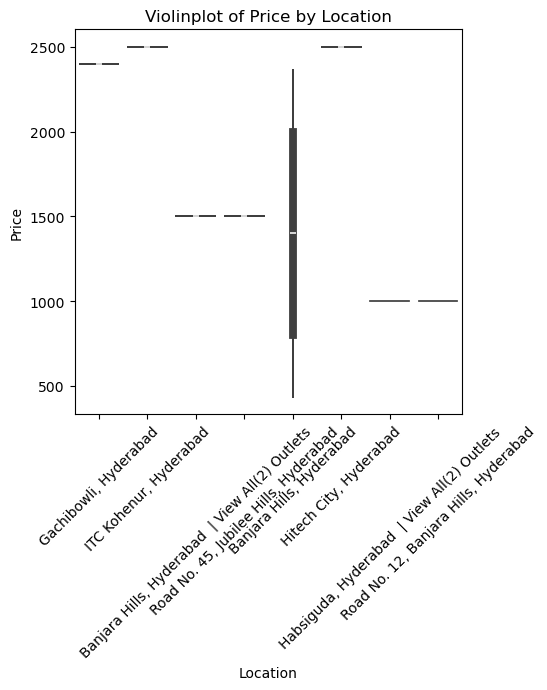


Groupby Summary: Price by Location


,mean,median,min,max,count
Location,,,,,
"Banjara Hills, Hyderabad",1400.0,1400.0,800,2000,388
"Banjara Hills, Hyderabad | View All(2) Outlets",1500.0,1500.0,1500,1500,194
"Gachibowli, Hyderabad",2400.0,2400.0,2400,2400,194
"Habsiguda, Hyderabad | View All(2) Outlets",1000.0,1000.0,1000,1000,194
"Hitech City, Hyderabad",2500.0,2500.0,2500,2500,194
"ITC Kohenur, Hyderabad",2500.0,2500.0,2500,2500,194
"Road No. 12, Banjara Hills, Hyderabad",1000.0,1000.0,1000,1000,194
"Road No. 45, Jubilee Hills, Hyderabad",1500.0,1500.0,1500,1500,194



Pivot Table: Price by Location


,mean,count
,Price,Price
Location,,
"Banjara Hills, Hyderabad",1400.0,388
"Banjara Hills, Hyderabad | View All(2) Outlets",1500.0,194
"Gachibowli, Hyderabad",2400.0,194
"Habsiguda, Hyderabad | View All(2) Outlets",1000.0,194
"Hitech City, Hyderabad",2500.0,194
"ITC Kohenur, Hyderabad",2500.0,194
"Road No. 12, Banjara Hills, Hyderabad",1000.0,194
"Road No. 45, Jubilee Hills, Hyderabad",1500.0,194


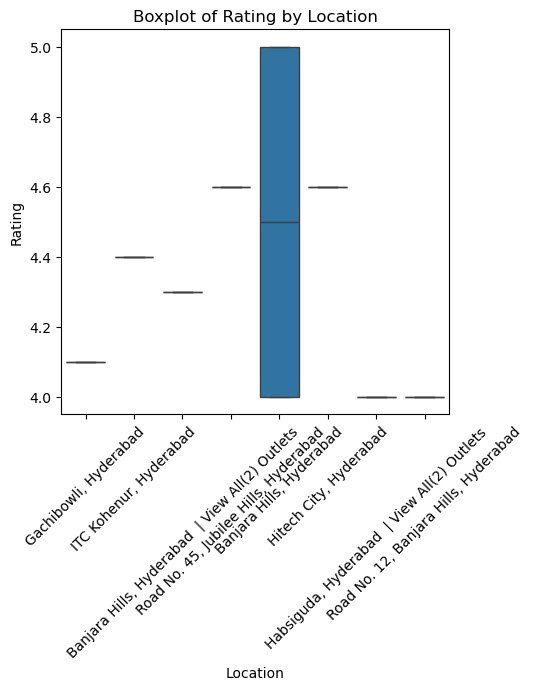

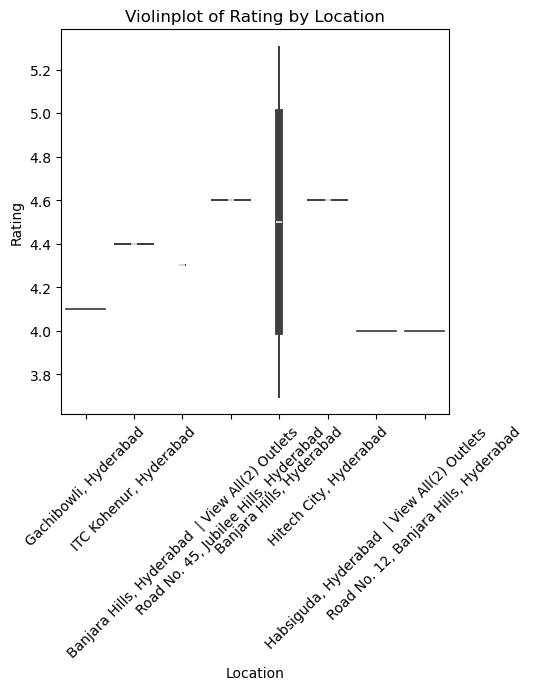


Groupby Summary: Rating by Location


,mean,median,min,max,count
Location,,,,,
"Banjara Hills, Hyderabad",4.5,4.5,4.0,5.0,388
"Banjara Hills, Hyderabad | View All(2) Outlets",4.3,4.3,4.3,4.3,194
"Gachibowli, Hyderabad",4.1,4.1,4.1,4.1,194
"Habsiguda, Hyderabad | View All(2) Outlets",4.0,4.0,4.0,4.0,194
"Hitech City, Hyderabad",4.6,4.6,4.6,4.6,194
"ITC Kohenur, Hyderabad",4.4,4.4,4.4,4.4,194
"Road No. 12, Banjara Hills, Hyderabad",4.0,4.0,4.0,4.0,194
"Road No. 45, Jubilee Hills, Hyderabad",4.6,4.6,4.6,4.6,194



Pivot Table: Rating by Location


,mean,count
,Rating,Rating
Location,,
"Banjara Hills, Hyderabad",4.5,388
"Banjara Hills, Hyderabad | View All(2) Outlets",4.3,194
"Gachibowli, Hyderabad",4.1,194
"Habsiguda, Hyderabad | View All(2) Outlets",4.0,194
"Hitech City, Hyderabad",4.6,194
"ITC Kohenur, Hyderabad",4.4,194
"Road No. 12, Banjara Hills, Hyderabad",4.0,194
"Road No. 45, Jubilee Hills, Hyderabad",4.6,194


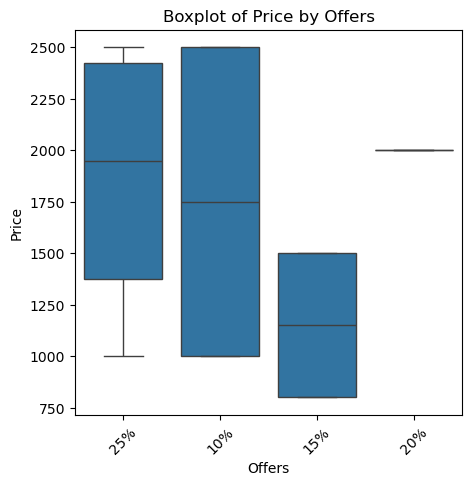

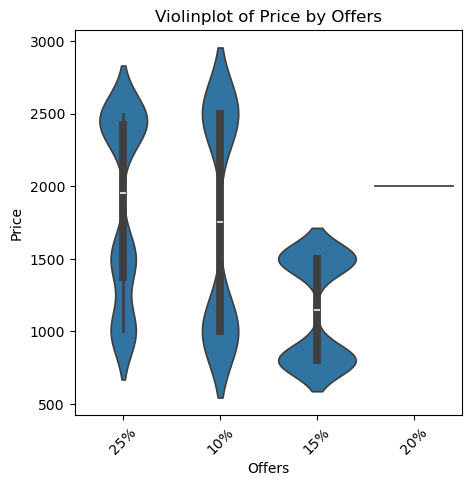


Groupby Summary: Price by Offers


,mean,median,min,max,count
Offers,,,,,
10%,1750.0,1750.0,1000,2500,388
15%,1150.0,1150.0,800,1500,388
20%,2000.0,2000.0,2000,2000,194
25%,1850.0,1950.0,1000,2500,776



Pivot Table: Price by Offers


,mean,count
,Price,Price
Offers,,
10%,1750.0,388
15%,1150.0,388
20%,2000.0,194
25%,1850.0,776


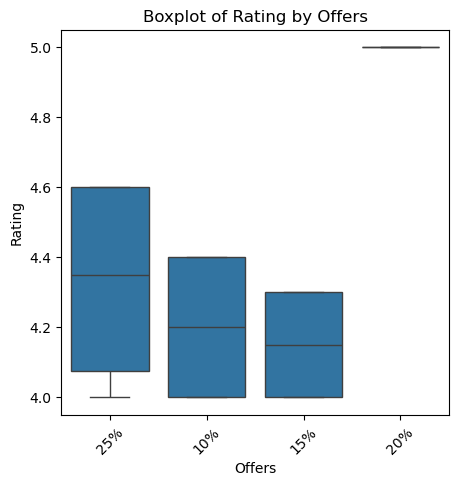

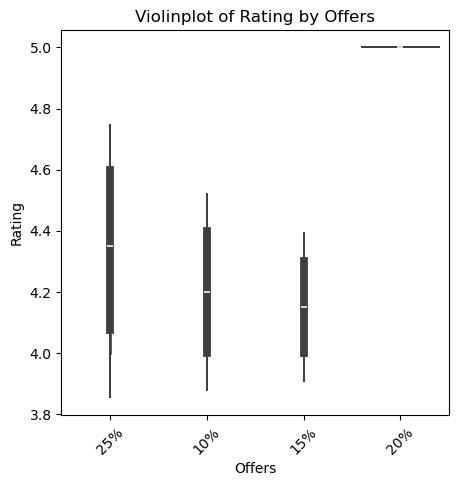


Groupby Summary: Rating by Offers


,mean,median,min,max,count
Offers,,,,,
10%,4.200,4.20,4.0,4.4,388
15%,4.150,4.15,4.0,4.3,388
20%,5.000,5.00,5.0,5.0,194
25%,4.325,4.35,4.0,4.6,776



Pivot Table: Rating by Offers


,mean,count
,Rating,Rating
Offers,,
10%,4.200,388
15%,4.150,388
20%,5.000,194
25%,4.325,776


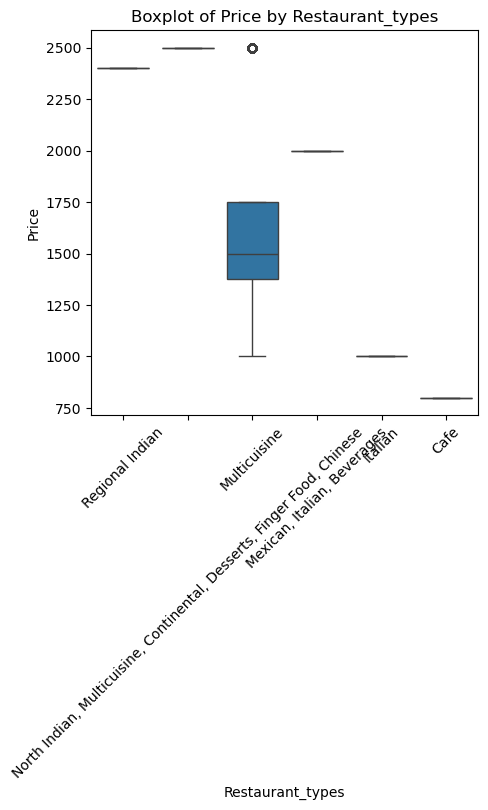

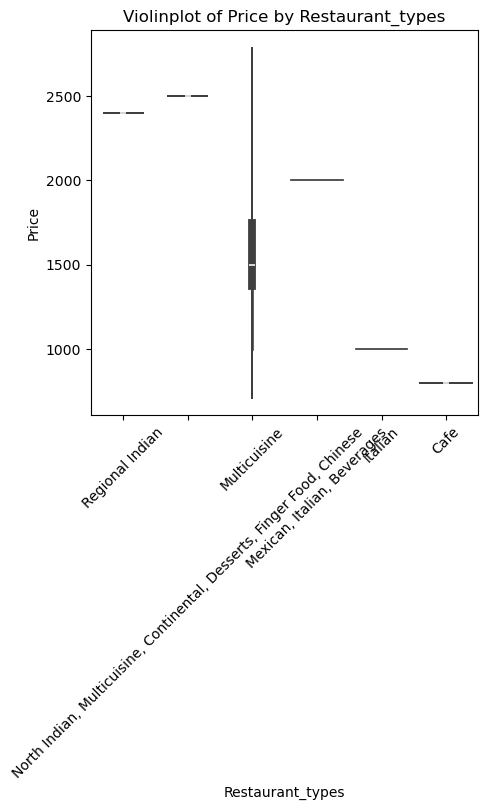


Groupby Summary: Price by Restaurant_types


,mean,median,min,max,count
Restaurant_types,,,,,
Cafe,800.0,800.0,800,800,194
Italian,1000.0,1000.0,1000,1000,194
"Mexican, Italian, Beverages",2000.0,2000.0,2000,2000,194
Multicuisine,1625.0,1500.0,1000,2500,776
"North Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese",2500.0,2500.0,2500,2500,194
Regional Indian,2400.0,2400.0,2400,2400,194



Pivot Table: Price by Restaurant_types


,mean,count
,Price,Price
Restaurant_types,,
Cafe,800.0,194
Italian,1000.0,194
"Mexican, Italian, Beverages",2000.0,194
Multicuisine,1625.0,776
"North Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese",2500.0,194
Regional Indian,2400.0,194


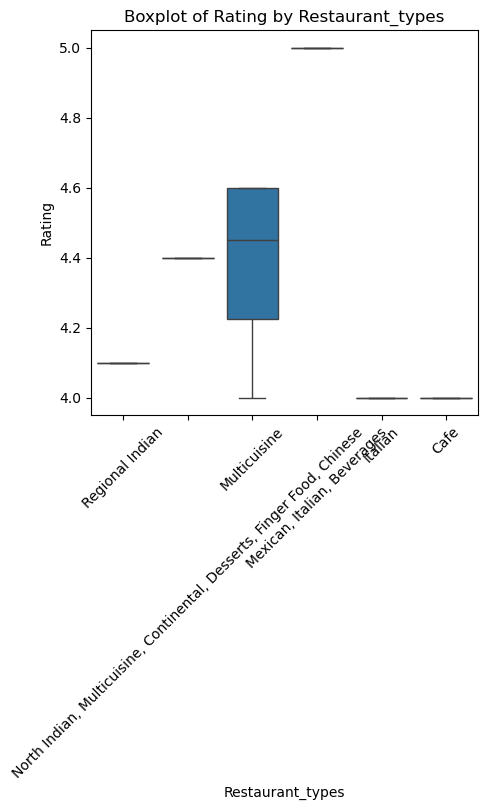

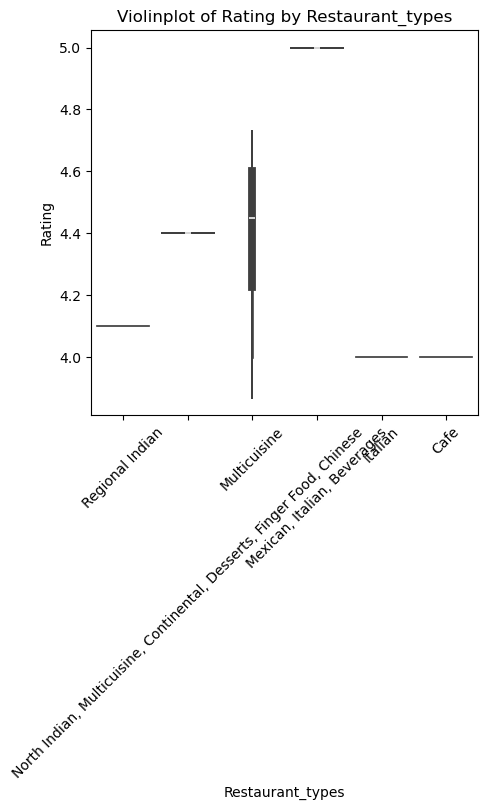


Groupby Summary: Rating by Restaurant_types


,mean,median,min,max,count
Restaurant_types,,,,,
Cafe,4.000,4.00,4.0,4.0,194
Italian,4.000,4.00,4.0,4.0,194
"Mexican, Italian, Beverages",5.000,5.00,5.0,5.0,194
Multicuisine,4.375,4.45,4.0,4.6,776
"North Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese",4.400,4.40,4.4,4.4,194
Regional Indian,4.100,4.10,4.1,4.1,194



Pivot Table: Rating by Restaurant_types


,mean,count
,Rating,Rating
Restaurant_types,,
Cafe,4.000,194
Italian,4.000,194
"Mexican, Italian, Beverages",5.000,194
Multicuisine,4.375,776
"North Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese",4.400,194
Regional Indian,4.100,194


In [69]:
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(5, 5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"Boxplot of {num} by {cat}")
        plt.xticks(rotation=45)
        plt.show()



        plt.figure(figsize=(5, 5))
        sns.violinplot(x=cat, y=num, data=df)
        plt.title(f"Violinplot of {num} by {cat}")
        plt.xticks(rotation=45)
        plt.show()

 # Groupby Summary
        group_summary = df.groupby(cat)[num].agg(['mean', 'median', 'min', 'max', 'count'])
        print(f"\nGroupby Summary: {num} by {cat}")
        display(group_summary)

# Pivot table example
        pivot_table = pd.pivot_table(df, values=num, index=cat, aggfunc=['mean', 'count'])
        print(f"\nPivot Table: {num} by {cat}")
        display(pivot_table)

## Continuous Variables ( BiVariate)- Correlation + Scatter

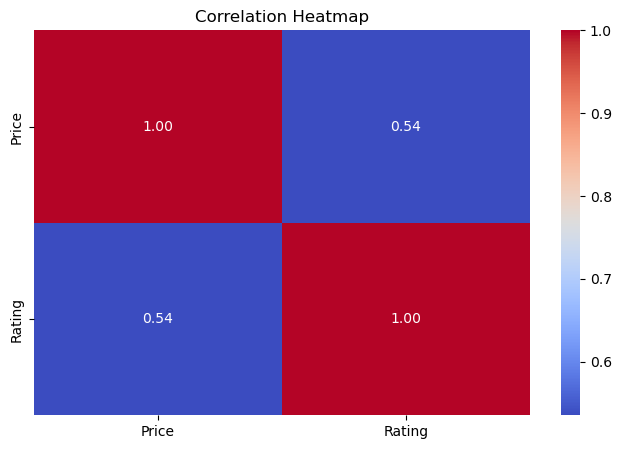

In [70]:

plt.figure(figsize=(8, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

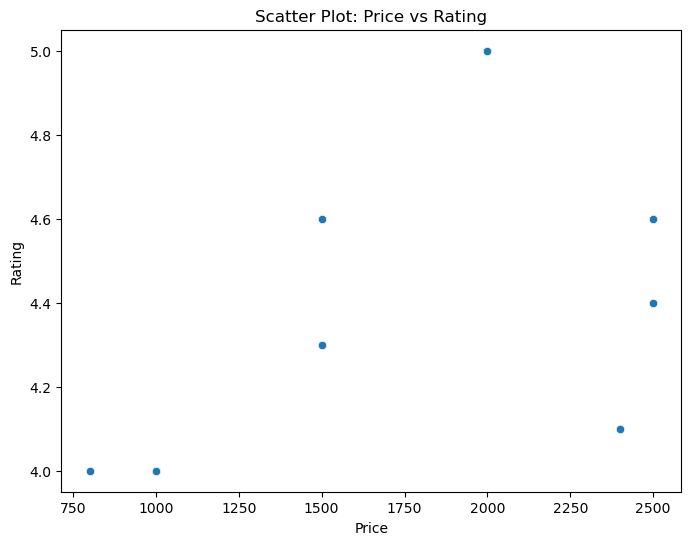

In [71]:
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]])
        plt.title(f"Scatter Plot: {num_cols[i]} vs {num_cols[j]}")
        plt.show()

## Categorical Variables(BiVariate) - Crosstab + Bar Chart


Crosstab between Location and Offers:



Offers,10%,15%,20%,25%
Location,,,,
"Banjara Hills, Hyderabad",0,194,194,0
"Banjara Hills, Hyderabad | View All(2) Outlets",0,194,0,0
"Gachibowli, Hyderabad",0,0,0,194
"Habsiguda, Hyderabad | View All(2) Outlets",0,0,0,194
"Hitech City, Hyderabad",0,0,0,194
"ITC Kohenur, Hyderabad",194,0,0,0
"Road No. 12, Banjara Hills, Hyderabad",194,0,0,0
"Road No. 45, Jubilee Hills, Hyderabad",0,0,0,194


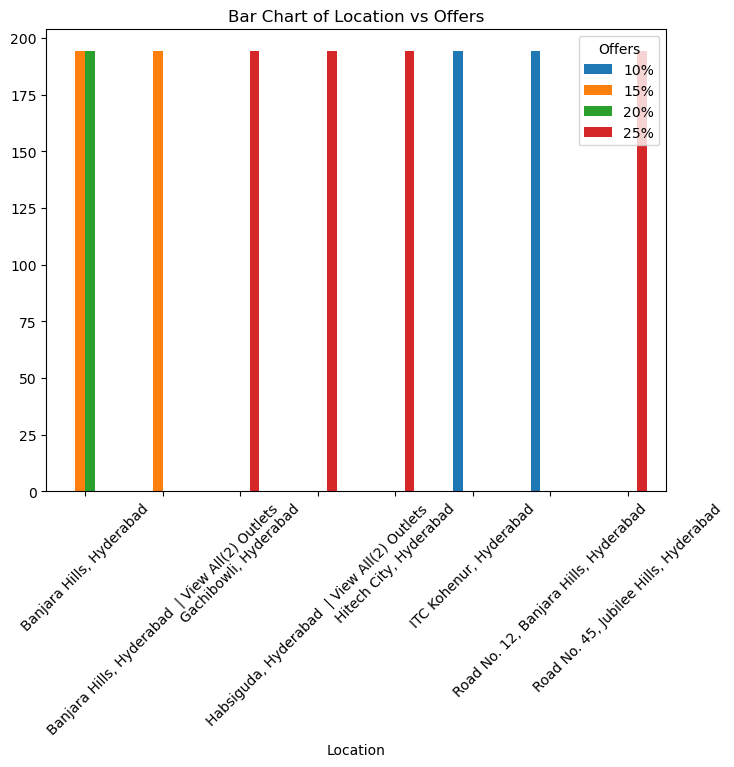


Crosstab between Location and Restaurant_types:



Restaurant_types,Cafe,Italian,"Mexican, Italian, Beverages",Multicuisine,"North Indian, Multicuisine, Continental, Desserts, Finger Food, Chinese",Regional Indian
Location,,,,,,
"Banjara Hills, Hyderabad",194,0,194,0,0,0
"Banjara Hills, Hyderabad | View All(2) Outlets",0,0,0,194,0,0
"Gachibowli, Hyderabad",0,0,0,0,0,194
"Habsiguda, Hyderabad | View All(2) Outlets",0,194,0,0,0,0
"Hitech City, Hyderabad",0,0,0,194,0,0
"ITC Kohenur, Hyderabad",0,0,0,0,194,0
"Road No. 12, Banjara Hills, Hyderabad",0,0,0,194,0,0
"Road No. 45, Jubilee Hills, Hyderabad",0,0,0,194,0,0


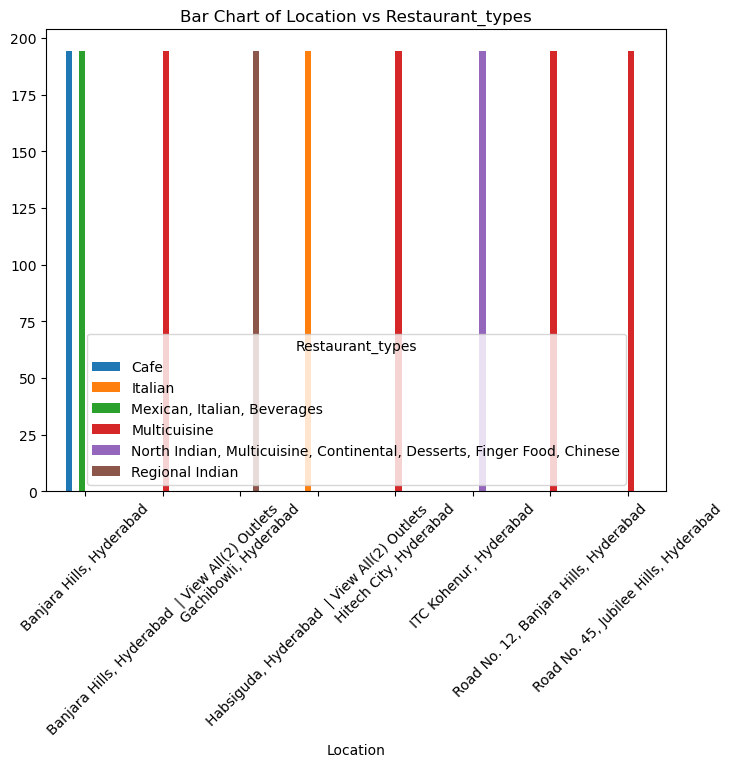

In [72]:
### for i in range(len(cat_cols)):
for j in range(i+1, len(cat_cols)):
        cross_tab = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
        print(f"\nCrosstab between {cat_cols[i]} and {cat_cols[j]}:\n")
        display(cross_tab)

        cross_tab.plot(kind='bar', figsize=(8, 6))
        plt.title(f"Bar Chart of {cat_cols[i]} vs {cat_cols[j]}")
        plt.xticks(rotation=45)
        plt.show()

# --- Multivariate Analysis with Visualizations ---

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
# --- Grouped summary ---
multi_group = df.groupby(['Location', 'Restaurant_types'])[['Price', 'Rating']].mean().reset_index()

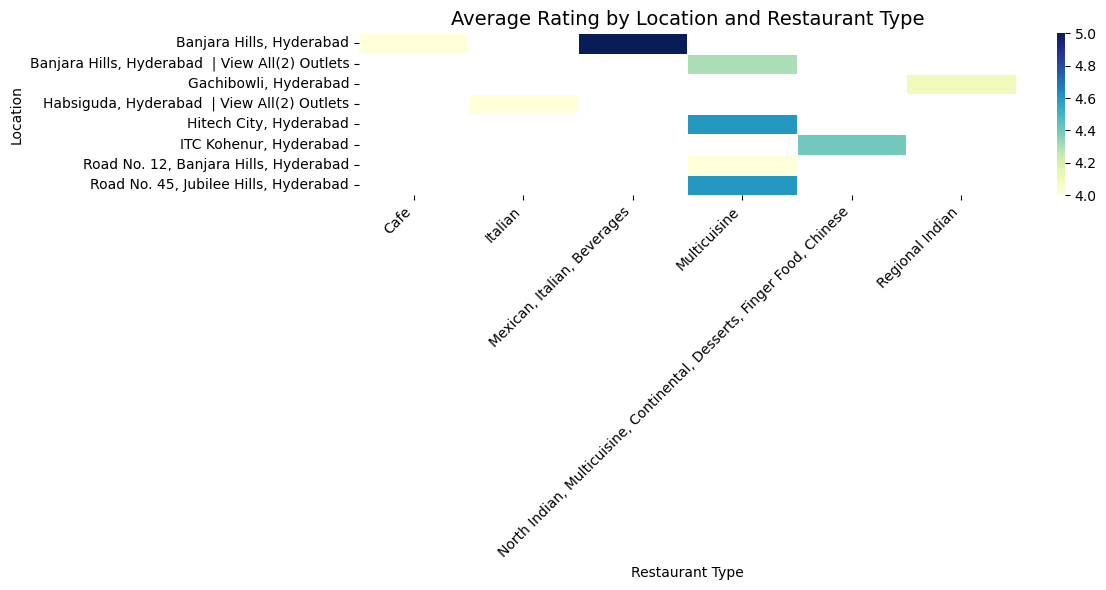

In [75]:
# ---  Heatmap: Average Rating by Location & Restaurant Type ---
pivot_rating = pd.pivot_table(
    df,
    values='Rating',
    index='Location',
    columns='Restaurant_types',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_rating, cmap='YlGnBu', linewidths=0.5)
plt.title("Average Rating by Location and Restaurant Type", fontsize=14)
plt.xlabel("Restaurant Type")
plt.ylabel("Location")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


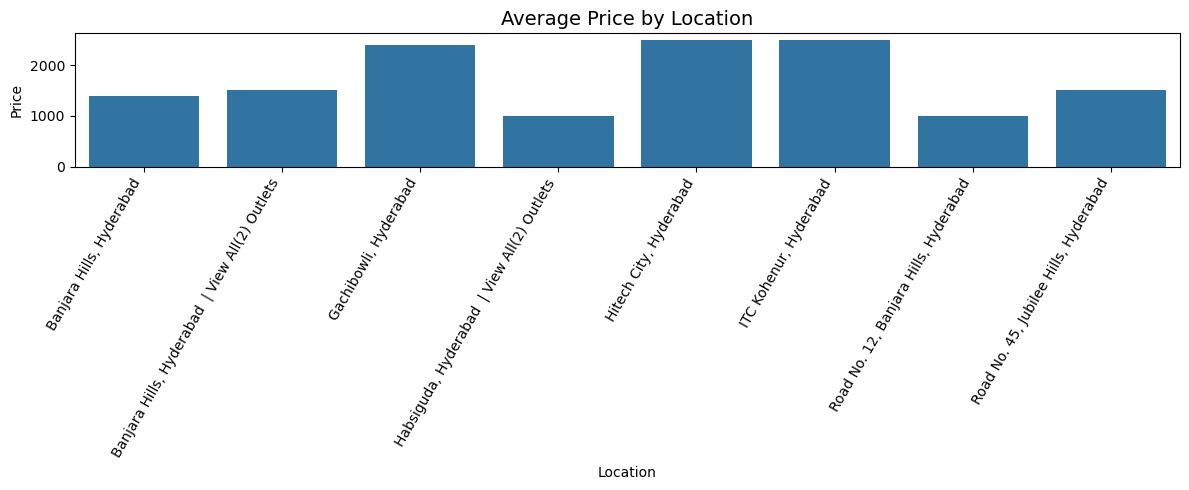

In [76]:
# --- 3️ Bar Plot: Average Price by Location ---
plt.figure(figsize=(12, 5))
sns.barplot(data=multi_group, x='Location', y='Price', ci=None)
plt.title("Average Price by Location", fontsize=14)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

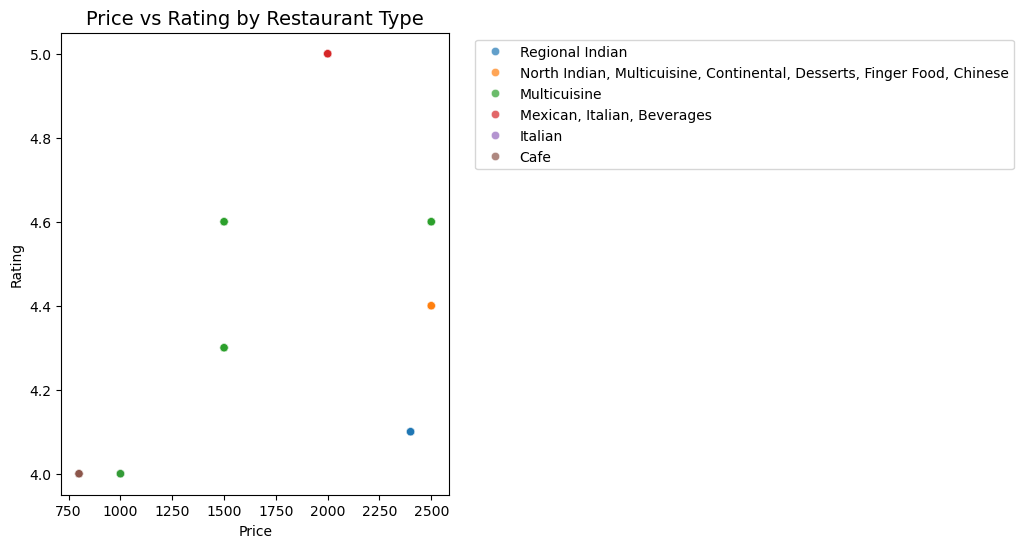

In [77]:
# --- Scatter Plot: Price vs Rating by Restaurant Type ---
plt.figure(figsize=(5, 6))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Restaurant_types', alpha=0.7)
plt.title("Price vs Rating by Restaurant Type", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

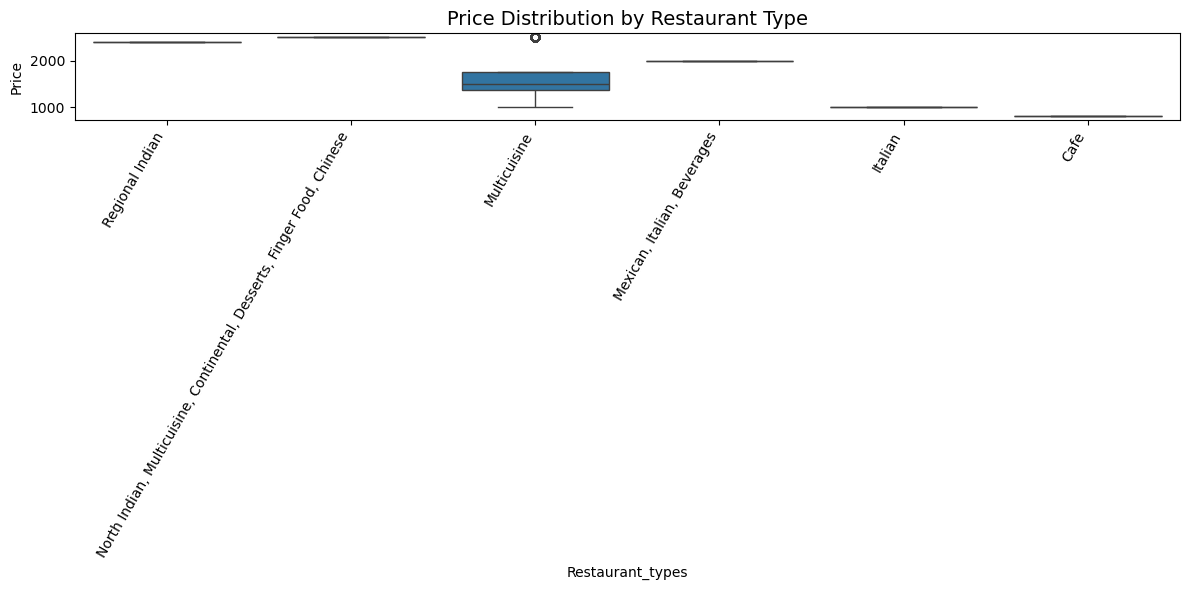

In [78]:
# ---  Box Plot: Price Distribution by Restaurant Type ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Restaurant_types', y='Price')
plt.title("Price Distribution by Restaurant Type", fontsize=14)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()